### Q1-1) Are there any useful variables that you can engineer with the given data? 

##### A. Total_product_purchases, Conversion rate of campaign acception and many others will be shown inside the notebook. 

### Q1-2) Are there any variables that warrant transformations? 

##### A. We can transform year columns into age columns. plaease refer to the below code


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [127]:
data = pd.read_csv("marketing_data.csv")
data.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

In [128]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [130]:
data = data.rename(columns={
    'Dt_Customer':'Enrollment date',
    'Recency':'Days since last purchase',
    ' Income ':'Income'})

In [131]:
data = data.dropna()
data.to_csv("assignment03_markting.csv")

In [132]:
data['Enrollment date'] = pd.to_datetime(data["Enrollment date"])  
# datatype : object -> datetime으로 변경 필요
data['Enrollment date']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Enrollment date, Length: 2216, dtype: datetime64[ns]

In [133]:
# Store customer's information
Customers = data.loc[:,:'Days since last purchase'].join(data[['Country']])  

# Store product's information
Products = data.loc[:,'MntWines':'MntGoldProds']     

# Store Purchases' information
Purchases = data.loc[:,'NumDealsPurchases':'NumWebVisitsMonth']    

# Store campaign's information
Campaigns = data.loc[:,'AcceptedCmp3':'AcceptedCmp2']     
Misc = data.loc[:,['Response','Complain']]

In [134]:
category = data.select_dtypes(include='object')
numeric = data.select_dtypes(exclude='object')

### Q2-1) Which marketing campaign is most successful?  

접근 : 각 캠페인 별 success rate를 pie chart로 시각화

In [135]:
each_campaign = np.sum(Campaigns, axis=0) 
CR_each_campaign = each_campaign/len(Campaigns)*100

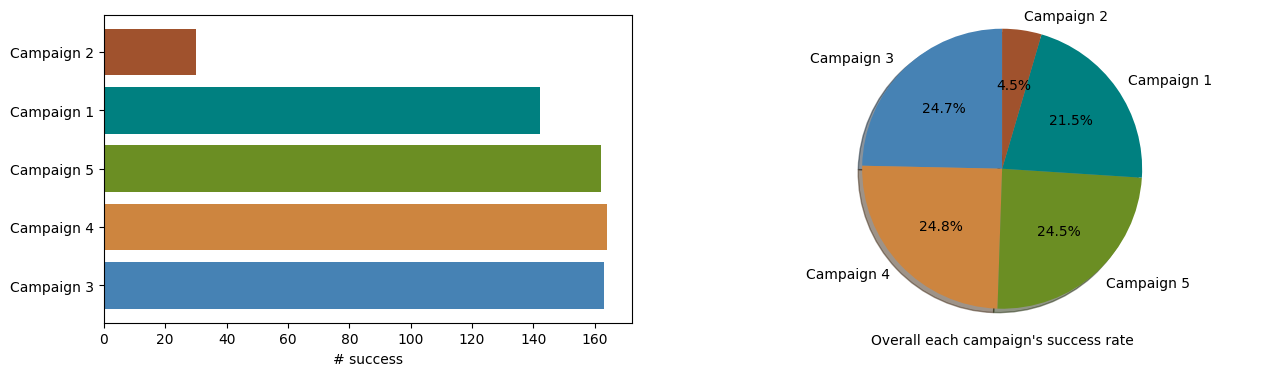

In [136]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,4)

cam_color = ['steelblue','peru','olivedrab','teal','sienna']

ax[0].barh(y=['Campaign 3','Campaign 4','Campaign 5','Campaign 1','Campaign 2'], 
           width=each_campaign.values, color=cam_color)
ax[0].set_xlabel('# success')

ax[1].pie(x=CR_each_campaign, labels=['Campaign 3','Campaign 4','Campaign 5','Campaign 1','Campaign 2'],
         autopct='%1.1f%%', shadow=True, startangle=90, colors=cam_color)
ax[1].axis('equal')
ax[1].set_xlabel('Overall each campaign\'s success rate')

plt.show()

##### A) 단순히, 다른 요인들을 고려하지 않고 각 캠페인의 성공률만 비교한 경우 *"campaign 4"*가 가장 성공적이었던 것으로 분석될 수 있다.

### Q2-2) What does the average customer look like for this company? 

1) 고객의 평균 소득/나이를 구해라 
2) 가장 많은 판매량을 보인 품목은? 
3) 가장 많은 판매량을 보인 나라는? 

접근 : customer와 관련된 지역/나이/소득 등 사용가능한 가용변수들을 모두 고려하여 파악해보자. 

### 1. Income 
각 국가별 고객들의 소득 mean/median 값은?

In [137]:
data['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2216, dtype: object

In [138]:
# object -> float
import re 
def re_sub(x):
    for i in x:
        return float(re.sub(r'[$,]',"",str(x)))  
data["Income"] = data["Income"].apply(re_sub)
data["Income"]

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2216, dtype: float64

In [139]:
category = data.select_dtypes(include='object')
numeric = data.select_dtypes(exclude='object')

In [140]:
data.describe()
# income outlier 화긴 

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

       Days since last purchase     MntWines    MntFruits  MntMeatProducts  \
count               2216.000000  2216.000000  2216.000000      2216.000000   
mean                  49.012635   305.091606    26.356047       166.995939   
std                   28.948352   337.327920    39.793917       224.283273   
min                    0.000000     0.000000     0.000000         0.000000   
25%                   24.000000    24.000000     2.000000        16.000000   
50%                   49.000000   174.500000     8.000000        68.000000   
75%                   74.000000   505.000000    33.000000       232.250000   
max                   99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000  ...          2216.000000        2216.000000   
mean         37.637635  ...             2.671029           5.800993   
std          54.752082  ...             2.926734           3.250785   
min           0.000000  ...             0.000000           0.000000   
25%           3.000000  ...             0.000000           3.000000   
50%          12.000000  ...             2.000000           5.000000   
75%          50.000000  ...             4.000000           8.000000   
max         259.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013538     0.150271     0.009477  
std        0.244950      0.115588     0.357417     0.096907  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 24 columns]

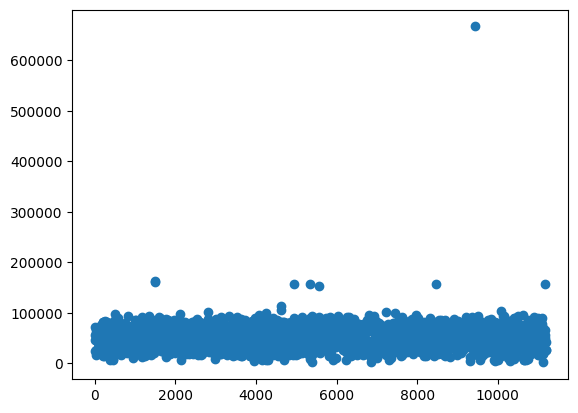

In [141]:
plt.scatter(data=data, x="ID", y="Income")
# outlier -> describe()를 통해 확인한 max 값 : 666666 
# 과도하게 큰 값은 mean 계산시 큰 영향을 미칠 수 있으므로 제거하고 계산하는 게 좋다. 

In [142]:
data[["Country"]]

Country
0         SP
1         CA
2         US
3        AUS
4         SP
...      ...
2235      US
2236      SP
2237      SP
2238     IND
2239      CA

[2216 rows x 1 columns]

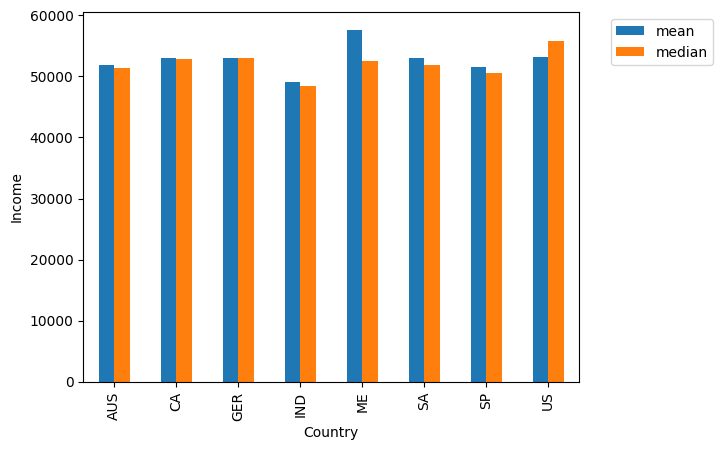

In [143]:
numeric_analysis = numeric[numeric['Income']!=666666]

df = pd.pivot_table(numeric_analysis.join(category[['Country']]), 
                     values='Income', 
                     index='Country', 
                     aggfunc={'Income':['mean','median']})
df.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Income')
plt.show()

## 2. Purchase 

접근 : total product amout 칼럼을 새로 만들어라.

팁 1) 파이(Pie)차트로 각 채널별 구매량 그리기 

팁 2) 바(bar) 차트로 어느 나라에서 가장 많은 구매량을 보였는지 그려라 

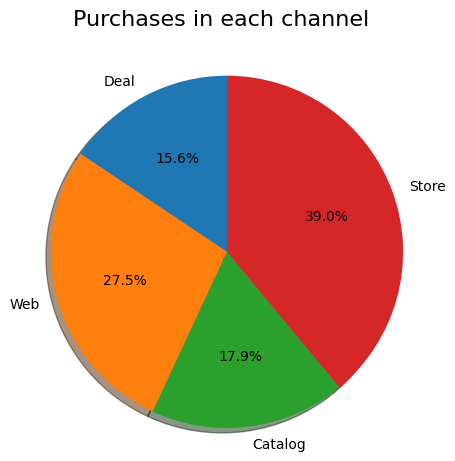

NumStorePurchases      38.982897
NumWebPurchases        27.453299
NumCatalogPurchases    17.949418
NumDealsPurchases      15.614386
dtype: float64


In [144]:
total_purchase_each = np.sum(Purchases.iloc[:,:-1], axis=0)

percent_purchase_each = total_purchase_each/np.sum(total_purchase_each)*100

def plot_pie_chart(labels, sizes: pd.Series, title):
    fig, ax = plt.subplots()
    fig.suptitle(title, fontsize=16)
    fig.set_size_inches(5,5)
    ax.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.axis('equal')  
    plt.show()
    print(sizes.sort_values(ascending=False))
    

plot_pie_chart(labels=['Deal','Web','Catalog','Store'], sizes=percent_purchase_each, title='Purchases in each channel')

##### store에서 가장 많은 구매량이 발생하였음을 확인할 수 있다.

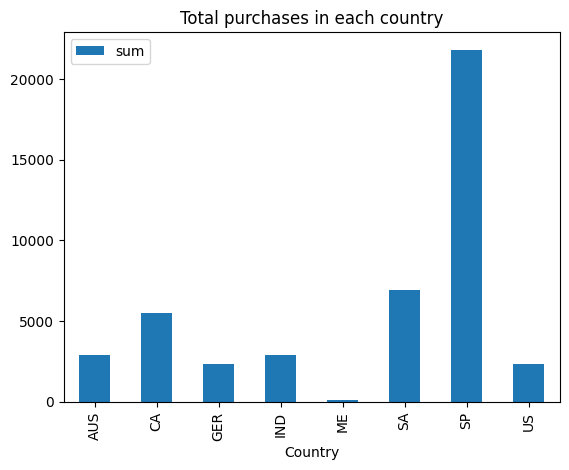

In [145]:
if 'Total purchase' not in Purchases.columns:
    Purchases['Total purchase'] = np.sum(Purchases, axis=1)

Purchase_category = Purchases.join(category)

Purchase_country_summary = pd.pivot_table(Purchase_category, 
                                          values='Total purchase', 
                                          index='Country', 
                                          aggfunc={'Total purchase':['sum']})

Purchase_country_summary.plot(kind='bar')
plt.title('Total purchases in each country')
plt.show()

### 스페인에서 구매한 고객이 가장 많음을 확인할 수 있다.

## Prodcut 
접근 : 이 역시 각 상품별 판매량을 pie chart로 그려서 확인하자. 

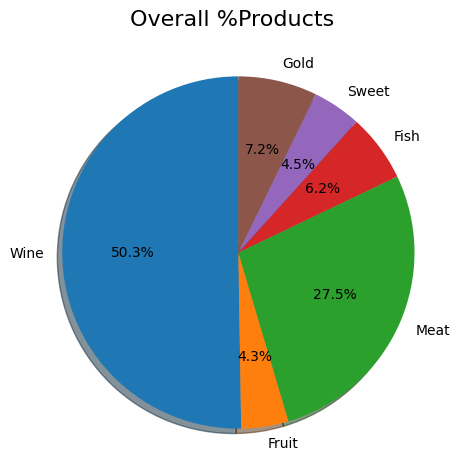

MntWines            50.255969
MntMeatProducts     27.508272
MntGoldProds         7.242141
MntFishProducts      6.199829
MntSweetProducts     4.452311
MntFruits            4.341479
dtype: float64


In [146]:
sum_each_product = np.sum(Products, axis=0)

plot_pie_chart(sizes=sum_each_product/np.sum(sum_each_product)*100, 
               labels=['Wine','Fruit','Meat','Fish','Sweet','Gold'],
              title='Overall %Products')

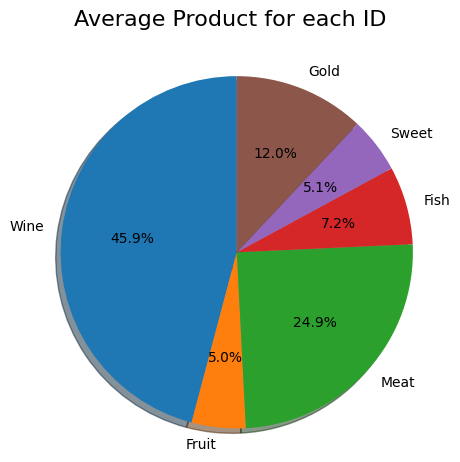

MntWines            45.869930
MntMeatProducts     24.907527
MntGoldProds        12.016669
MntFishProducts      7.175871
MntSweetProducts     5.074888
MntFruits            4.955116
dtype: float64


In [147]:
# 추가적으로 각 id별 구매량도 확인해보자. 
if 'Total' not in Products.columns:
    Products['Total'] = np.sum(Products, axis=1)

Each_ID_Products = Products.apply(lambda x:x/x[-1]*100, axis=1)

Avg_Each_ID_Products = np.mean(Each_ID_Products, axis=0)

plot_pie_chart(sizes = Avg_Each_ID_Products[:-1], 
               labels=['Wine','Fruit','Meat','Fish','Sweet','Gold'],
               title='Average Product for each ID')

##### 모든 고객들이 구매한 상품 중 약 50.2%가 와인(wine)이고 다음이 고기(meat;27.6%)

## age

1) 고객이 몇 년에 태어났는지를 알려주는 "Year_Birth" 칼럼을 이용하여 고객의 현재 나이를 구하고 & <br>     
2) 고객이 몇 살에 가입했는지를 'Enrollment date' - 'Year_Birth'를 통해 구하여 새로운 칼럼으로 지정해주자

In [148]:
# add Age column
from datetime import date

Age = date.today().year-numeric['Year_Birth'] 
numeric.insert(1, 'Age', Age)    
# add Enroll_at_age column 
Enroll_at_age = numeric['Enrollment date'].dt.year - numeric['Year_Birth']
numeric.insert(6, 'Enroll_at_age', Enroll_at_age) 


In [149]:
numeric['Age'].mean() 

53.17960288808664

##### 평균 고객 나이 약 53.2세 (middle-age) 임을 확인할 수 있다

In [150]:
numeric.columns

Index(['ID', 'Age', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome',
       'Enroll_at_age', 'Enrollment date', 'Days since last purchase',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')

##### A)
1) 고객의 평균 소득/연령은?

52247.251354 / 53.2세

2) 가장 많은 판매(구매)량을 보인 품목은? 

wine

3) 가장 많은 구매가 이루어진 나라는?  

spain 


### Q2-3) Which products are performing best? 
##### A. wine
앞의 분석을 통해 확인할 수 있었다.

### Q2-4) Which channels are underperforming?  
##### A. Deal(purchase by discount deal)
이 역시 purchase 분석을 통해 확인할 수 있었다.  